In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import daily cost csv
df = pd.read_csv('~/Documents/python_projects/finance/srp/data/dailyCost7_14_2025_to_9_26_2025.csv')
# drop last combined row 
df = df.drop(df.index[-1])
# import hourly cost csv
df1 = pd.read_csv('~/Documents/python_projects/finance/srp/data/hourlyCost7_14_2025_to_9_26_2025.csv')
# convert usage date to pandas datetime
df['Usage date'] = pd.to_datetime(df['Usage date'])
# remove $ and covert to float
df['Total cost'] = df['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
# create a new column with the day of week
df['Day of week'] = df['Usage date'].dt.day_name()
print(df.dtypes)
df.head()

Meter read date                 object
Usage date              datetime64[ns]
Total cost                     float64
High temperature (F)           float64
Low temperature (F)            float64
Day of week                     object
dtype: object


,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,7/16/2025,2025-07-15,4.42,105.0,86.0,Tuesday
2,7/17/2025,2025-07-16,3.23,95.0,82.0,Wednesday
3,7/18/2025,2025-07-17,3.53,100.0,80.0,Thursday
4,7/19/2025,2025-07-18,5.17,106.0,86.0,Friday


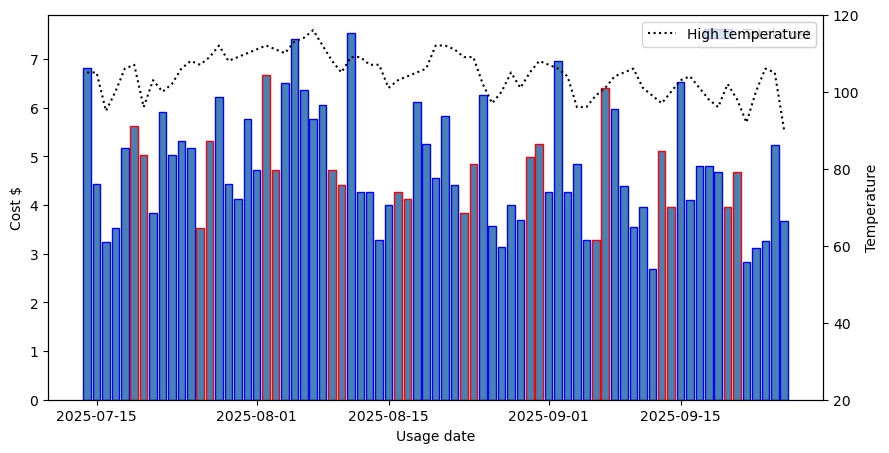

In [7]:
# create a list that assignes colors for the weekdays/weekends for Day of Week
colors = ['red' if day in ['Saturday', 'Sunday'] else 'blue' for day in df['Day of week']]
# initate figure and axis for plotting
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Usage date'], df['Total cost'], edgecolor = colors, color = 'steelblue', label = 'Total Cost')
# create a secondary axis on the same figure for the temperature
ax1 = ax.twinx()
ax1.plot(df['Usage date'], df['High temperature (F)'], 'k', ls = 'dotted', label = 'High temperature') 
ax.set_xlabel('Usage date')
ax.set_ylabel('Cost $')
#ax.set_ylim(0,8)
ax1.set_ylabel('Temperature')
ax1.set_ylim(20,120)
ax.legend()
ax1.legend()

mean    4.770267
max     7.530000
min     2.680000
std     1.139442
Name: Total cost, dtype: float64
The object is a Pandas DataFrame.


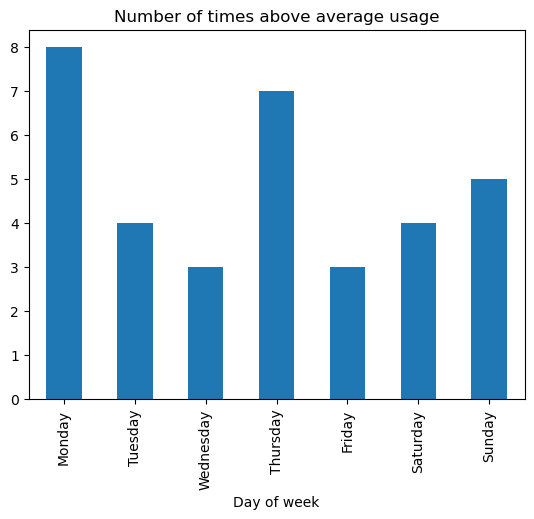

In [9]:
# get the mean, max, min, and standard deviation of the data set
stat = df['Total cost'].agg(['mean', 'max', 'min', 'std'])
print(stat)
# create a data frame that contains the days that have above average energy use
above_average = df[df['Total cost'].ge(stat['mean'])]
# Group and count the days of week that are above average energy use
day_groups = above_average.groupby('Day of week')['Day of week'].value_counts()
# create new index to sort the days of week chronologically
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_groups.index = pd.CategoricalIndex(day_groups.index, categories=days_order, ordered=True)
day_groups = day_groups.sort_index()
# bar graph of the days of week that are above average 
day_groups.plot(kind='bar', title='Number of times above average usage')

if isinstance(above_average, pd.DataFrame):
    print("The object is a Pandas DataFrame.")
else:
    print("The object is not a Pandas DataFrame.")

In [11]:
weekend_costs = df[df["Day of week"].isin(["Saturday", "Sunday"])]["Total cost"]
print(weekend_costs)

5     5.62
6     5.02
12    3.53
13    5.32
19    6.66
20    4.72
26    4.72
27    4.41
33    4.27
34    4.13
40    3.84
41    4.84
47    4.98
48    5.26
54    3.28
55    6.40
61    5.10
62    3.96
68    3.96
69    4.67
Name: Total cost, dtype: float64


,Usage date,Interval,Total cost,Datetime,Day of week
0,2025-07-14,12:0 AM,0.11,2025-07-14 00:00:00,Monday
1,2025-07-14,1:0 AM,0.11,2025-07-14 01:00:00,Monday
2,2025-07-14,2:0 AM,0.12,2025-07-14 02:00:00,Monday
3,2025-07-14,3:0 AM,0.11,2025-07-14 03:00:00,Monday
4,2025-07-14,4:0 AM,0.10,2025-07-14 04:00:00,Monday


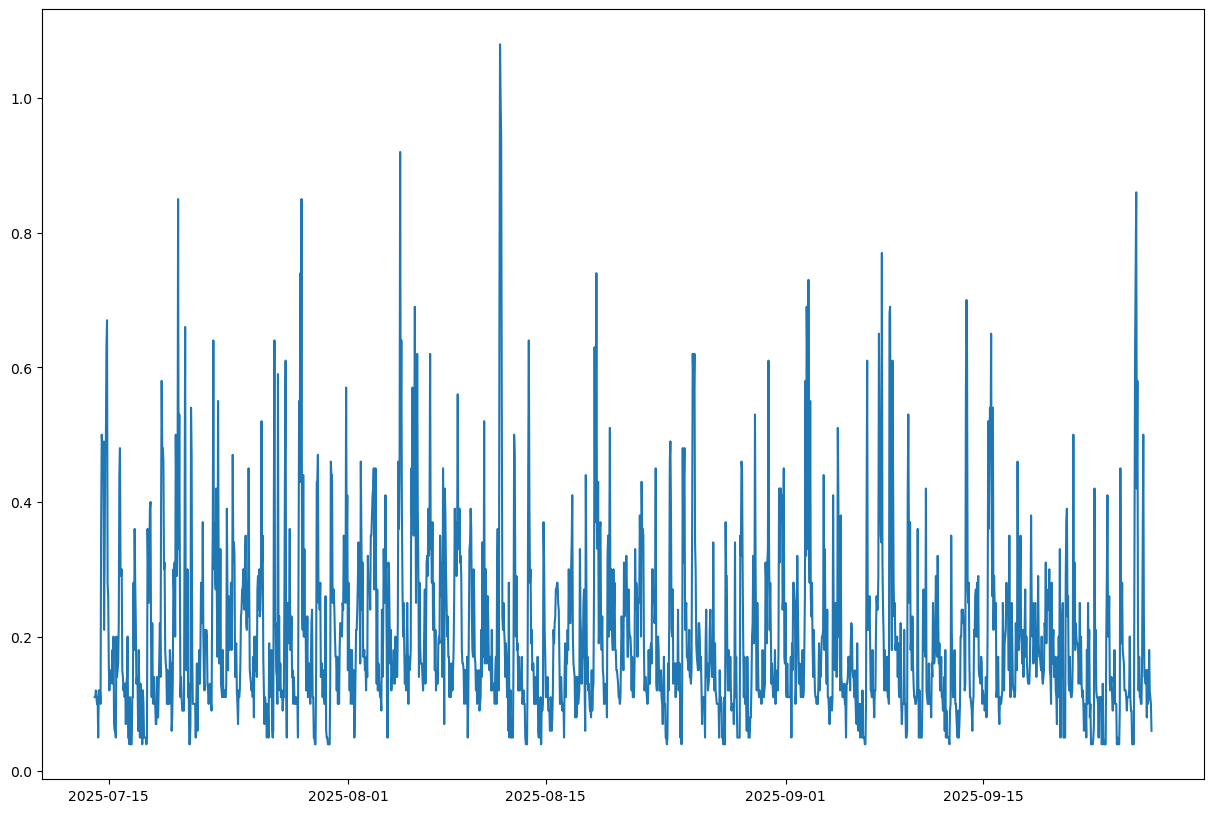

In [13]:
df1['Total cost'] = df1['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df1["Datetime"] = pd.to_datetime(df1["Usage date"] + " " + df1["Interval"], format="%m/%d/%Y %I:%M %p")
df1['Day of week'] = df1['Datetime'].dt.day_name()
df1['Usage date'] = pd.to_datetime(df1['Usage date'])

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df1['Datetime'], df1['Total cost'])
df1.head()

In [14]:
max = df.loc[df['Total cost'] == df['Total cost'].max()]
max_date = max['Usage date'].iloc[0]
print(max_date)

2025-08-11 00:00:00


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<Axes: xlabel='Datetime'>

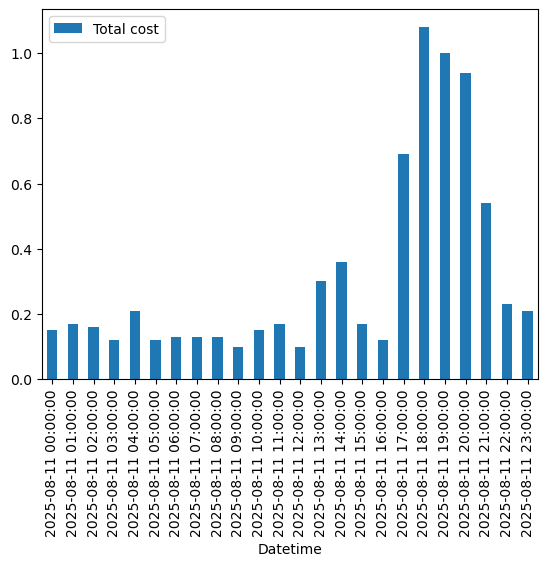

In [30]:
""" 
    The above cell sets 'max' equal to the daily dataframe where 'Total cost'
    is at the maximum value. Then, it again sorts and takes the 'Usage date'
    where that occured. Then, this cell takes that date and sorts the hourly
    dataframe by that max date. The day is then plotted
"""

max_day = df1.loc[df1['Usage date'] == max_date]

max_date1 = df.loc[df['Total cost'].idxmax(), 'Usage date']
max_day1 = df1[df1['Usage date'] == max_date1]
#max_day1.plot.bar(x='Datetime', y='Total cost')
print(type(max_date1))
max_day.plot.bar(x= 'Datetime', y='Total cost')

In [78]:
"""
Creates a dataframe containing days where the total cost is greater than or equal to the 
mean plus 1 standard deviation
"""

above_average1 = df[df['Total cost'].ge(stat['mean'] + stat['std'])].reset_index(drop = True)
above_average1

,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,7/23/2025,2025-07-22,5.91,100.0,84.0,Tuesday
2,7/29/2025,2025-07-28,6.21,112.0,82.0,Monday
3,8/3/2025,2025-08-02,6.66,112.0,89.0,Saturday
4,8/5/2025,2025-08-04,6.51,110.0,85.0,Monday
5,8/6/2025,2025-08-05,7.40,113.0,88.0,Tuesday
6,8/7/2025,2025-08-06,6.36,114.0,89.0,Wednesday
7,8/9/2025,2025-08-08,6.06,112.0,89.0,Friday
8,8/12/2025,2025-08-11,7.53,109.0,90.0,Monday
9,8/19/2025,2025-08-18,6.11,105.0,81.0,Monday


<Axes: xlabel='Datetime'>

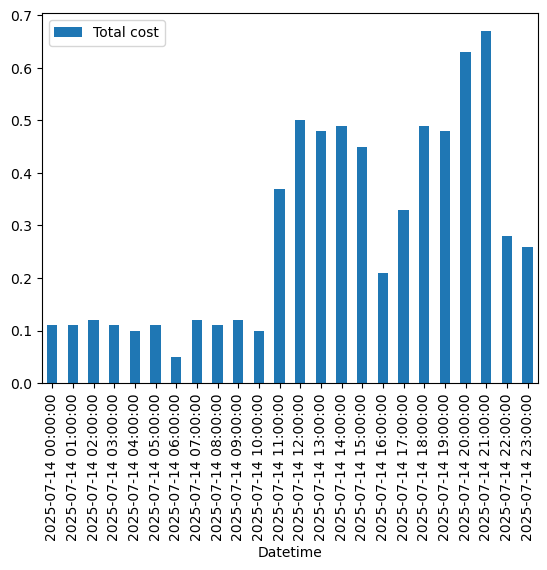

In [42]:
day0 = df1.loc[df1['Usage date'] == above_average1['Usage date'][0]]
day0.plot.bar(x= 'Datetime', y='Total cost')


In [80]:
"""
I could be smart and fix this whole documents with good variable names, but I am not 
going to do that. Instead, I am going to rename the variables here and work with them here. 
"""
daily_df = df
hourly_df = df1
#High use days sorted by 
high_use_days = above_average1.sort_values(by = 'Total cost', ascending = False)

high_use_days

,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
8,8/12/2025,2025-08-11,7.53,109.0,90.0,Monday
5,8/6/2025,2025-08-05,7.40,113.0,88.0,Tuesday
11,9/3/2025,2025-09-02,6.96,106.0,84.0,Tuesday
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
3,8/3/2025,2025-08-02,6.66,112.0,89.0,Saturday
14,9/16/2025,2025-09-15,6.52,103.0,74.0,Monday
4,8/5/2025,2025-08-04,6.51,110.0,85.0,Monday
12,9/8/2025,2025-09-07,6.40,101.0,81.0,Sunday
6,8/7/2025,2025-08-06,6.36,114.0,89.0,Wednesday
10,8/26/2025,2025-08-25,6.26,102.0,74.0,Monday


In [76]:
"""
Okay, instead of plotting all the dates that are above average, how about 
we plot, say, the top 4? That should let the graphing not get too out of 
hand
"""
for i in high_use_days[0:5]:
    print(i)


index
Meter read date
Usage date
Total cost
High temperature (F)
Low temperature (F)
Day of week
